<a href="https://colab.research.google.com/github/MaksShaB/classifier/blob/main/FMnist_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейронные сети. Прострой перцептрон, полносвязная нейросеть (DNN), сверочная нейросеть(CNN).



## Подготовка данных

Посмотрим сбалансированая выборка или нет, по результатам  примем решение по дальнейшей работе(балансировать выборку, использовать нестандартные метрики)







In [ ]:
#%matplotlib inline
import pandas as pd
import numpy as np
import sklearn.preprocessing as pr
import matplotlib.pyplot as plt
import tensorflow as tf
"""Вариант загрузки с google drive своего родного
from google.colab import drive 
drive.mount('/content/drive')# смонтировали гугл диск
#грузим данные из гугл диска
# очень медленно train_x = np.genfromtxt("/content/drive/My Drive/Fmist/fashion-mnist_train.csv", delimiter=',')
# очень медленно test_x = np.genfromtxt("/content/drive/My Drive/Fmist/fashion-mnist_test.csv", delimiter=',')
#train_ds=pd.read_csv("/content/drive/My Drive/Fmist/fashion-mnist_train.csv")
test_ds=pd.read_csv("/content/drive/My Drive/Fmist/fashion-mnist_test.csv")
#  входные данные готовим, нормализуем значения
x_train=np.array(train_ds.iloc[:,1:])/255
x_test=np.array(test_ds.iloc[:,1:])/255
y_train=np.array(train_ds.iloc[:, 0])
y_test=np.array(test_ds.iloc[:, 0])
print(x_train.shape, y_test.shape)
"""

#  загрузка через стандартный загрузчиk керас
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()









'Вариант загрузки с google drive своего родного\nfrom google.colab import drive \ndrive.mount(\'/content/drive\')# смонтировали гугл диск\n#грузим данные из гугл диска\n# очень медленно train_x = np.genfromtxt("/content/drive/My Drive/Fmist/fashion-mnist_train.csv", delimiter=\',\')\n# очень медленно test_x = np.genfromtxt("/content/drive/My Drive/Fmist/fashion-mnist_test.csv", delimiter=\',\')\n#train_ds=pd.read_csv("/content/drive/My Drive/Fmist/fashion-mnist_train.csv")\ntest_ds=pd.read_csv("/content/drive/My Drive/Fmist/fashion-mnist_test.csv")\n#  входные данные готовим, нормализуем значения\nx_train=np.array(train_ds.iloc[:,1:])/255\nx_test=np.array(test_ds.iloc[:,1:])/255\ny_train=np.array(train_ds.iloc[:, 0])\ny_test=np.array(test_ds.iloc[:, 0])\nprint(x_train.shape, y_test.shape)\n'

Метки классов:[0 1 2 3 4 5 6 7 8 9],
 количество элементов в классах: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


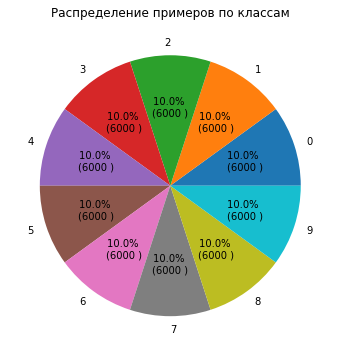

In [ ]:
class_, class_count_s=np.unique(train_y, return_counts=True)
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}% \n({absolute:d} )"
fig=plt.figure(figsize=(20,6))    
plt.pie(class_count_s, labels=class_, autopct=lambda pct: func(pct, class_count_s))
plt.title("Распределение примеров по классам")
# print(f'Метки классов:{class_},\n количество элементов в классах: {class_count_s}')

Выборка сбалансированная, можно использовать стандартные метрики

In [ ]:
# произведем нормировку входных данных(перенесем область значений в диапазон [0,1],  выходные значения преобразуем в вектор признаков класса )
train_x=train_X/255
test_x=test_x/255
y_test_one_hot=pr.OneHotEncoder(y_test)
y_train_one_hot=pr.OneHotEncoder(y_train)

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

# **Полносвязная нейросетка**

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.7298 - accuracy: 0.7409 - val_loss: 0.4712 - val_accuracy: 0.8183
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5193 - accuracy: 0.8171 - val_loss: 0.4245 - val_accuracy: 0.8426
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4765 - accuracy: 0.8310 - val_loss: 0.3949 - val_accuracy: 0.8510
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4485 - accuracy: 0.8418 - val_loss: 0.3886 - val_accuracy: 0.8599
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4306 - accuracy: 0.8461 - val_loss: 0.3684 - val_accuracy: 0.8667
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4175 - accuracy: 0.8515 - val_loss: 0.3737 - val_accuracy: 0.8664
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4054 - accuracy: 0.8570 - val_loss: 0.3527 - val_accuracy:

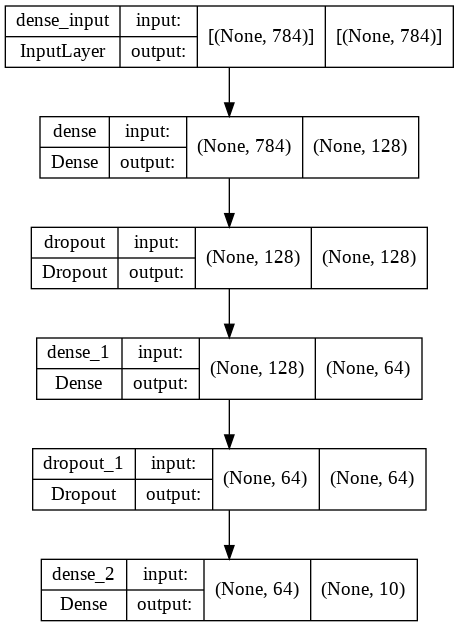

In [ ]:

import matplotlib.pyplot as plt
# делаем классификатор на основе полносвязный нейросети
model_MPL = tf.keras.models.Sequential(name='model_DNN')
model_MPL.add(tf.keras.layers.Dense(128,activation='relu',input_shape=(784, ))) # добавляем слои
model_MPL.add(tf.keras.layers.Dropout(0.3))
#model_MPL.add(tf.keras.layers.BatchNormalization())# Batch нормализация, в данном случае абсолютно бессмыcленно ее применение
model_MPL.add(tf.keras.layers.Dense(64, activation='relu'))
model_MPL.add(tf.keras.layers.Dropout(0.5))
model_MPL.add(tf.keras.layers.Dense(num_output, activation='softmax'))# 
my_Opt = tf.keras.optimizers.Adam(learning_rate=0.0011, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_MPL.compile(optimizer=my_Opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history_MPL=model_MPL.fit(train_x, y_train_one_hot, batch_size=32, epochs=10, validation_split=0.2)
eva=model_MPL.evaluate(test_x, y_test_one_hot)
print(model_MPL.summary(), 'аccuracy:',eva[1]) 
# красиво 
tf.keras.utils.plot_model(model_MPL, show_shapes=True)





# **Анализ полносвязной  нейросети**

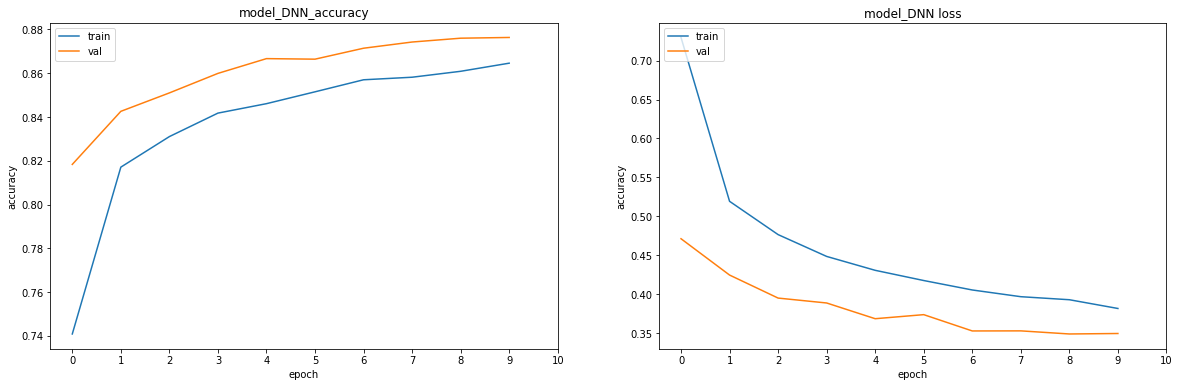

In [ ]:
fig=plt.figure(figsize=(20,6))
# Слева анализируем accuracy
ax = fig.add_subplot(121)
ax.plot(history_MPL.history['accuracy'])
ax.plot(history_MPL.history['val_accuracy'])
ax.set_title('model_DNN_accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.set_xticks(range(0,11))
ax.legend(['train', 'val'], loc='upper left')
# Справа loss значение
ax2 = fig.add_subplot(122)
ax2.plot(history_MPL.history['loss'])
ax2.plot(history_MPL.history['val_loss'])
ax2.set_title('model_DNN loss')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(0,11))
ax2.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.8791 - accuracy: 0.7250 - val_loss: 0.6572 - val_accuracy: 0.7913
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6183 - accuracy: 0.8017 - val_loss: 0.5805 - val_accuracy: 0.8101
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5631 - accuracy: 0.8160 - val_loss: 0.5443 - val_accuracy: 0.8186
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5337 - accuracy: 0.8246 - val_loss: 0.5240 - val_accuracy: 0.8235
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5142 - accuracy: 0.8300 - val_loss: 0.5075 - val_accuracy: 0.8281
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4998 - accuracy: 0.8338 - val_loss: 0.4986 - val_accuracy: 0.8298
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4891 - accuracy: 0.8366 - val_loss: 0.4888 - val_accuracy:

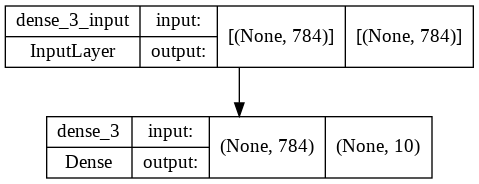

In [ ]:
# простейший логистический регрессор, это просто 1 слойная нейросеть

number_of_classes = 10# количество классов  на выходе
number_of_features = 784 #количество входных параметров- длина 
model_log = tf.keras.models.Sequential(name='model_log')
model_log.add(tf.keras.layers.Dense(number_of_classes, activation = 'softmax', input_dim = number_of_features))
model_log.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history_log=model_log.fit(train_x, y_train_one_hot, batch_size=32, epochs=10, validation_split=0.2)
eva_1=model_log.evaluate(test_x, y_test_one_hot)
print(model_log.summary(), 'аccuracy:',eva_1[1]) 
tf.keras.utils.plot_model(model_log, show_shapes=True)


# **Анализ логистического регрессора**

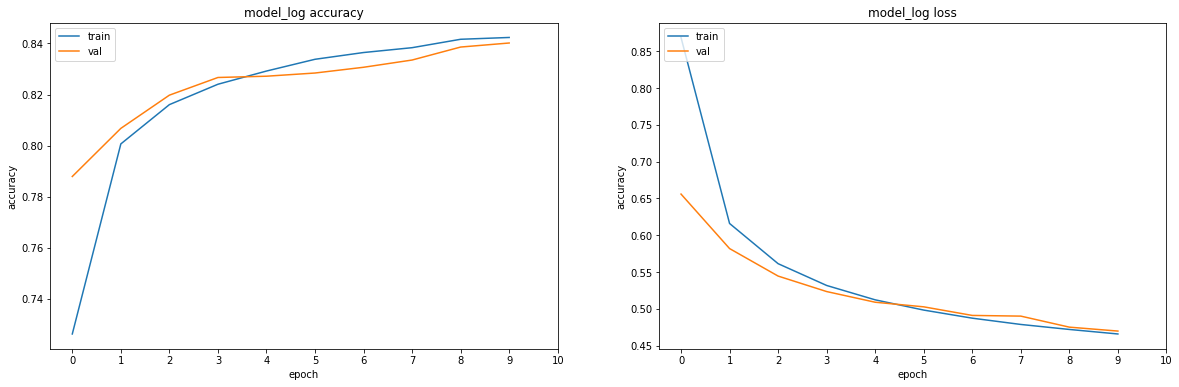

In [ ]:
fig=plt.figure(figsize=(20,6))
# Слева анализируем accuracy
ax = fig.add_subplot(121)
ax.plot(history_log.history['accuracy'])
ax.plot(history_log.history['val_accuracy'])
ax.set_title('model_log accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.set_xticks(range(0,11))
ax.legend(['train', 'val'], loc='upper left')
# Справа loss значение
ax2 = fig.add_subplot(122)
ax2.plot(history_log.history['loss'])
ax2.plot(history_log.history['val_loss'])
ax2.set_title('model_log loss')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(0,11))
ax2.legend(['train', 'val'], loc='upper left')
plt.show()

# **Сверточная нейросетка**




Epoch 1/20
1500/1500 [==============================] - 15s 4ms/step - loss: 0.5289 - accuracy: 0.8151 - val_loss: 0.3314 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3463 - accuracy: 0.8753 - val_loss: 0.2879 - val_accuracy: 0.8982 - lr: 0.0010
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2973 - accuracy: 0.8918 - val_loss: 0.2709 - val_accuracy: 0.9033 - lr: 0.0010
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2690 - accuracy: 0.9023 - val_loss: 0.2643 - val_accuracy: 0.9053 - lr: 0.0010
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2474 - accuracy: 0.9110 - val_loss: 0.2622 - val_accuracy: 0.9049 - lr: 0.0010
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2080 - accuracy: 0.9241 - val_loss: 0.2478 - val_accuracy: 0.9130 - lr: 1.0000e-05
Epoch 7/20
1500/1500 [==============================]

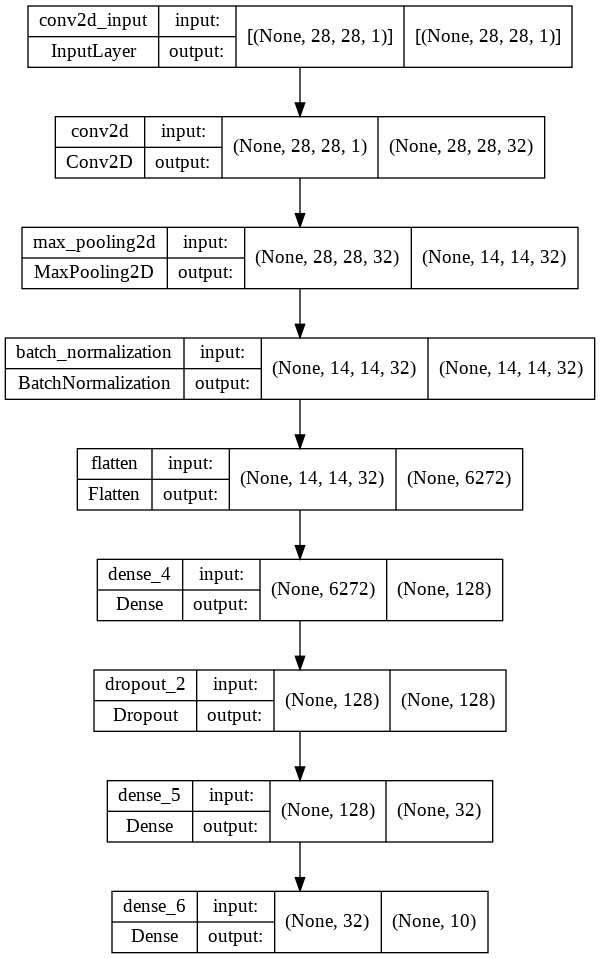

In [ ]:
# сверточная нейронка
# исходники для сверточной сети, меняем форму входных данных
x_test_cnn=test_x.reshape(-1,28,28,1)
x_train_cnn=train_x.reshape(-1,28,28,1)


model_cnn = tf.keras.models.Sequential(name='model_cnn')
model_cnn.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1 )))# 1й сверточный
model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))# 1е понижение масштаба
#model_cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))# 2е понижение масштаба точность падает, 
model_cnn.add(tf.keras.layers.BatchNormalization())# Batch нормализация

model_cnn.add(tf.keras.layers.Flatten())# преобразования в одномерный из 2мерного
model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn.add(tf.keras.layers.Dropout(0.5))
model_cnn.add(tf.keras.layers.Dense(32, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(num_output, activation='softmax'))#  выходной слой

#myOpt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)# вариант стахостического градиентный спуска, с оптимизицией Нестерова
my_Opt_cnn = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_cnn.compile(loss='categorical_crossentropy', 
optimizer=my_Opt_cnn,    metrics=['accuracy'] )  

#поработаем с  earlystopping  и learning rate, т.е оптимизируем обучение
# from tensorflow.keras.callbacks import  LearningRateSheduller

from tensorflow.keras.callbacks import  EarlyStopping, LearningRateScheduler
 # пилим функцию, от количества эпох  изменяет скорость обучения
def sheduler(learning_rate, epoch):
    lr=learning_rate
    if lr<=4:learning_rate=1e-3
    elif lr<10 and lr>4 : learning_rate=1e-5
    else: learning_rate=1e-6
    return learning_rate
callback=LearningRateScheduler(sheduler)# создали диспетчер  с функцией изменения скорости обучения в зависимости от эпохи
# посмотрим, что вышло

history_cnn=model_cnn.fit(x_train_cnn, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2, callbacks=[callback])

# явно престает обучаться после 15 эпохи, нужно быструю остановку прописать
eva_cnn=model_cnn.evaluate(x_test_cnn, y_test_one_hot)




print(model_cnn.summary(), 'аccuracy:',eva_cnn[1]) 
tf.keras.utils.plot_model(model_cnn, show_shapes=True, )# схема нейросети

### *Анализ сверточной сети*

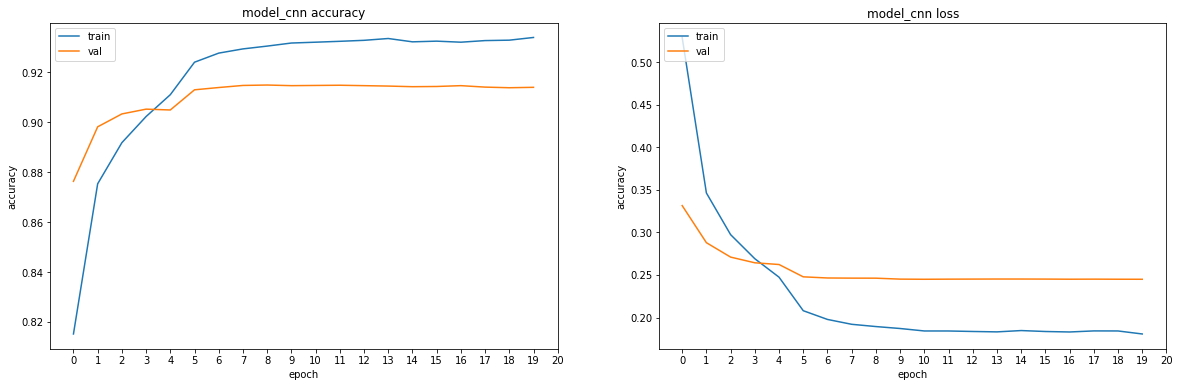

In [ ]:
from pandas.core.frame import DataFrame
#print(history_cnn.history)
fig=plt.figure(figsize=(20,6))
# Слева анализируем accuracy
ax = fig.add_subplot(121)
ax.plot(history_cnn.history['accuracy'])
ax.plot(history_cnn.history['val_accuracy'])
ax.set_title('model_cnn accuracy')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.set_xticks(range(0,21))
ax.legend(['train', 'val'], loc='upper left')
# Справа loss значение
ax2 = fig.add_subplot(122)
ax2.plot(history_cnn.history['loss'])
ax2.plot(history_cnn.history['val_loss'])
ax2.set_title('model_cnn loss')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(0,21))
ax2.legend(['train', 'val'], loc='upper left')
plt.show()

#eva_cnn=model_cnn.evaluate(x_test_cnn, y_test_one_hot)
# print(eva_cnn)

# **Выводы**


1. Самая точная сверточная. Точность (91%). В сверточной SGD оптимизация лучше, чем Адам, для данной архитектуры и количества эпох. Очень быстро обучается и начинает  переобучаться.Это явно видно при сравнении значений loss  функций на обучающей и валидационной выборке. Снижение скорости обучения,не очень эффективно. Последние 5 эпох абсолютно бесполезны
2. В полносвязной нейросетке, батч нормализация эффективнее чем дропаут.
3. Однослойная нейросетсетка самая малая точность(83%).
4. Графики построены для обучающей выборки и для валидационной на каждой эпохе.


